In [1]:
# Libraries
from sklearn.cluster import KMeans
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.pipeline import Pipeline as imbalanced_pipeline

In [2]:
df = pd.read_excel('SQL_Data.xlsx')
y = df['Fraud']
X = df.drop(columns=['Fraud','no_attending_physicians','PID','AttendingPhysician'])

In [3]:
X['clinic_size'] = X['clinic_size'].map({'Small': 0, 'Large': 1})

In [4]:
X['pay_relative_stay'] = X.apply(lambda row: row['total_amount_reimbursed'] if pd.isna(row['pay_relative_stay']) else row['pay_relative_stay'], axis=1)

In [5]:
y = y.map({'Yes': 1, 'No': 0})

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
X_train

,total_no_of_claims,total_amount_reimbursed,avg_inpatient_time,pay_relative_stay,no_unique_beneficiaries,pct_female_patients,pct_male_patients,pct_renal_disease,pct_alzheimer,pct_Heartfailure,...,pct_pregnancy,pct_skin,pct_musculoskeletal,pct_congenital,pct_perinatal,pct_symptoms,pct_injury,pct_beneficiaries_did_not_pay_deductible,types_of_patients_handled,clinic_size
8140,24,195000,4.875000,1666.666667,24,0.666667,0.333333,0.291667,0.583333,0.25,...,0.0,0.041667,0.166667,0.0,0,0.250000,0.041667,0.083333,10,0
5147,1,3000,3.000000,1000.000000,1,1.000000,0.000000,0.000000,1.000000,0.00,...,0.0,0.000000,0.000000,0.0,0,1.000000,0.000000,0.000000,1,1
5853,1,9000,2.000000,4500.000000,1,1.000000,0.000000,0.000000,0.000000,0.00,...,0.0,0.000000,0.000000,0.0,0,0.000000,0.000000,0.000000,1,1
9899,3,22000,5.333333,1375.000000,3,0.333333,0.666667,0.333333,1.000000,0.00,...,0.0,0.000000,0.000000,0.0,0,0.333333,0.000000,0.000000,3,1
3166,1,7000,3.000000,2333.333333,1,1.000000,0.000000,1.000000,1.000000,0.00,...,0.0,0.000000,0.000000,0.0,0,1.000000,0.000000,0.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1,14000,3.000000,4666.666667,1,1.000000,0.000000,0.000000,0.000000,0.00,...,0.0,0.000000,1.000000,0.0,0,0.000000,0.000000,0.000000,1,0
5191,1,3000,9.000000,333.333333,1,0.000000,1.000000,0.000000,1.000000,1.00,...,0.0,0.000000,0.000000,0.0,0,0.000000,0.000000,0.000000,1,1
5390,1,8000,8.000000,1000.000000,1,1.000000,0.000000,0.000000,0.000000,0.00,...,0.0,0.000000,0.000000,0.0,0,1.000000,0.000000,0.000000,1,1
860,1,4000,1.000000,4000.000000,1,0.000000,1.000000,0.000000,0.000000,1.00,...,0.0,0.000000,0.000000,0.0,0,0.000000,0.000000,0.000000,1,1


In [8]:
# Scale the data
scaler = MinMaxScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_train

array([[5.97402597e-02, 4.57735734e-02, 1.39285714e-01, ...,
        8.33333333e-02, 6.42857143e-01, 0.00000000e+00],
       [0.00000000e+00, 7.04208821e-04, 8.57142857e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 2.11262646e-03, 5.71428571e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [0.00000000e+00, 1.87789019e-03, 2.28571429e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 9.38945095e-04, 2.85714286e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.40841764e-03, 2.85714286e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [9]:
scaled_X_test = scaler.transform(X_test)
scaled_X_test

array([[0.        , 0.00375578, 0.11428571, ..., 0.        , 0.        ,
        1.        ],
       [0.0025974 , 0.00234736, 0.05714286, ..., 0.        , 0.07142857,
        0.        ],
       [0.        , 0.00140842, 0.08571429, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.0025974 , 0.00281684, 0.07142857, ..., 0.        , 0.07142857,
        1.        ],
       [0.11948052, 0.10117133, 0.12583587, ..., 0.        , 0.5       ,
        0.        ],
       [0.00519481, 0.00234736, 0.06666667, ..., 0.        , 0.07142857,
        1.        ]])

In [10]:
model = LogisticRegression()
model.fit(scaled_X_train, y_train)

LogisticRegression()

In [46]:
predicted_probabilities = model.predict_proba(scaled_X_test)[:, 1]
predictions = (predicted_probabilities > 0.4).astype(int)

In [47]:
accuracy = accuracy_score(y_test,predictions)
accuracy

0.6719843268961657

In [48]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.61      0.71      2303
           1       0.53      0.78      0.63      1270

    accuracy                           0.67      3573
   macro avg       0.68      0.70      0.67      3573
weighted avg       0.73      0.67      0.68      3573



In [49]:
print(confusion_matrix(y_test, predictions))

[[1405  898]
 [ 274  996]]


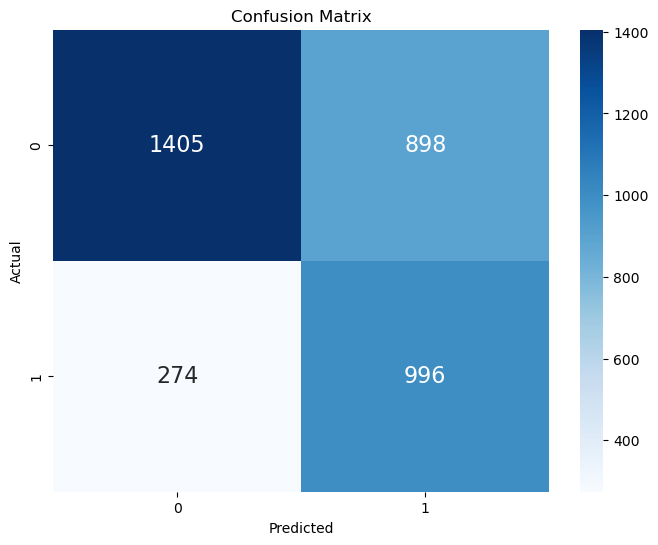

In [50]:
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 16})

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [51]:
feature_importance = model.coef_[0]

# Create a DataFrame to display feature importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.reindex(feature_importance_df.Importance.sort_values(ascending=False).index)

print("Feature Importance:")
feature_importance_df[feature_importance_df["Importance"]!=0]

Feature Importance:


,Feature,Importance
40,types_of_patients_handled,3.858745
41,clinic_size,1.929803
1,total_amount_reimbursed,1.548023
4,no_unique_beneficiaries,1.347247
3,pay_relative_stay,1.268752
0,total_no_of_claims,1.099095
2,avg_inpatient_time,0.884895
32,pct_pregnancy,0.587057
22,pct_infectious,0.544158
8,pct_alzheimer,0.223793


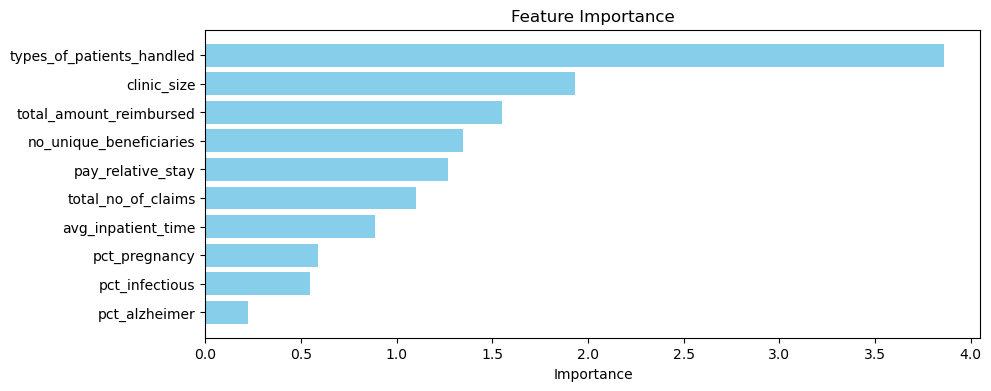

In [52]:
filtered_importance_df = feature_importance_df[feature_importance_df["Importance"] != 0]
top_10_features = filtered_importance_df.nlargest(10, 'Importance').sort_values('Importance', ascending=True)

plt.figure(figsize=(10, 4))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')

plt.show()